There are many reoccurring patterns in gene regulatory networks. In this project, you will be exploring three of them -- a signal cascade of activators, a feed forward loop, and a negative feedback loop. The third example is in the context of a specific biological system -- the fruit fly circadian clock. 

Your goal is to understand the purpose and mechanisms of these patterns (how do they work? why do we have them?). To accomplish your goal, you should explore and understand the ranges of behaviors of each pattern.

## Part 1. A Cascade of Activators

Consider a system in which a "signal"  enters the cell (in form of protein X\*) and binds to the promoter region of gene y, activating its transcription. Once protein Y has been translated, it binds to the promoter of gene z, activating its transcription. The image below shows the network diagram for such a system. We assume that production of Y is governed by Hill kinetics with a maximal rate of transcription $vY_{max}$, activation coefficient $K_Y$, and Hill coefficient $n_Y$. Likewise, the production of Z is governed by Hill kinetics with the analogous parameters $vZ_{max}$, $K_Z$, and $n_Z$. Both Y and Z are degraded using mass action kinetics with the rate constant $d$. X* is the input and as such can be thought of as an additional, time-varying parameter.

<img src="pos_cascade.pdf">
<center>A signal cascade of activators. X* activates synthesis of protein Y, which activates synthesis of protein Z.</center>

<hr style="border:2px solid gray"> </hr>

(1) Write down the ODEs that describe this system. Assume that X\* is a time-dependent parameter and that we need not include mRNA explicitly. In other words, use 2 ODEs. You may want to call X\* simply X so that it works well in Latex.

The parameters are
- vY_max: maximum rate of Y's transcription
- Ky: the activation threshold for X's activation of Y
- ny: the Hill coefficient (exponent) for X's activation of Y
- d: the degradation rate constant for Y and Z
- X: the amount of X in the system
- vZmax: maximum rate of Z's transcription
- Kz: the activation threshold for Y's activation of Z
- nz: the Hill coefficient (exponent) for Y's activation of Z



The model's activation function is

$\frac{dY}{dt} = vY_{max} \frac{x^{n_{y}}}{K_{y}^{n_{y}}+x^{n_{y}}}-d*Y$

$\frac{dZ}{dt} = vZ_{max} \frac{y^{n_{z}}}{K_{z}^{n_{z}}+y^{n_{z}}}-d*Z$

<hr style="border:2px solid gray"> </hr>

(2) Write the Python code necessary to simulate the system. Given the parameters, $vY_{max} = 1 nM/s$, $K_Y = 0.5 nM$, $n_Y=2$, $vZ_{max} = 1 nM/s$, $K_Z = 0.5 nM$, $n_Z=2$, and $d=0.1$ and initial conditions $Y(0) =0$ and $Z(0)=0$, simulate the system for 150 seconds with the signal "off" during the first 50 seconds and "on" for the rest of the simulation. In other words, simulate the system from $t=0$ to $t=150s$ (with a time step $\le0.1s$) when the input X\*(t) = 0 for $0\le t<50s$ and X\*(t) = 1 thereafter.

Remember to label your axes and your lines (i.e. use a legend). Also, add a new Markdown cell below the figure to describe what it contains and why it shows your calculation is correct.

Note: It is a good idea to run the simulation twice - once with X\* at 0, and one with X\* at 1. Set up the second simulation to use sol.y\[:,-1\] as the initial condition for y. (If you instead attempt to use an if-statement in the model code (e.g. if t < timeOn), then the numerical integrator may take such large steps that it steps over the time t=50 and misses its chance to do what it needs to do.)

Text(0.5, 0, 'Time')

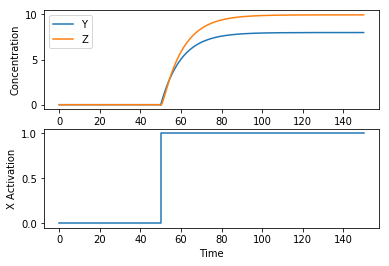

In [1]:
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt
def chain_activator(t, statevars, params):
    Y = statevars[0]
    Z = statevars[1]
    
    vY_max = params[0]
    Ky = params[1]
    ny = params[2]
    vZ_max = params[3]
    Kz = params[4]
    nz = params[5]
    d = params[6]
    x = params[7]
    
    dydt = np.zeros( (2,) )
    dydt[0] = vY_max* x**ny/(Ky**ny + x**ny) - d*Y;
    dydt[1] = vZ_max* Y**nz/(Kz**nz + Y**nz) - d*Z;
    
    return dydt
    


vY_max = 1
Ky = 0.5
ny = 2
vZ_max = 1
Kz = 0.5
nz = 2
d = 0.1

Y0 = 0 #initial values
Z0 = 0

params_off = (vY_max, Ky, ny, vZ_max, Kz, nz, d, 0)
params_on = (vY_max, Ky, ny, vZ_max, Kz, nz, d, 1)


time_x_on = 50
ca_off = lambda t,y : chain_activator(t,y, params_off)
ca_on = lambda t,y : chain_activator(t,y, params_on)

sol1 = scipy.integrate.solve_ivp( fun=ca_off, t_span=(0,time_x_on), y0=(Y0,Z0), t_eval=np.arange(0,time_x_on,.01) )
sol2 = scipy.integrate.solve_ivp( fun=ca_on, t_span=(time_x_on,150), y0=sol1.y[:,-1], t_eval=np.arange(time_x_on,150,.01) )

#plot it
plt.subplot(2,1,1)

plt.plot(sol1.t, sol1.y.T)
plt.gca().set_prop_cycle(None)
plt.plot(sol2.t, sol2.y.T)
plt.legend(["Y", "Z"])
plt.xlabel("Time")
plt.ylabel("Concentration")

#extension compare to activation area
plt.subplot(2,1,2)
plt.gca().set_prop_cycle(None)
plt.plot( [sol1.t[0],time_x_on,time_x_on, sol2.t[-1]],[0,0,1,1])
plt.ylabel("X Activation")
plt.xlabel("Time")

The graph above shows that when X is off (X=0) (from time 0 to 50), the X does not activate Y, and so Y does not activate Z. It makes sense that all of them stay at 0 from time 0 to 50. Once X is turned on (X=1), then we see that Y is affected by x the activator, and then Z is affected even more by Y as an activator. So the chain activation from X to Z is multiplied, because Y itself is activated by X, and is also an activator for Z. The "cascade" here amplifies the signal from X to Z overall.

Extension Explanation: 
We have graphed X to explain the relation between X, Y, and Z. In the additional graph, we see that as soon as X increases in quantity, there is an increase of concentration of Y and Z, effectively displaying the connection of X as an activator for Y and the indirect relationship where Z is affected by X through Y.

<hr style="border:2px solid gray"> </hr>

(3) X\* provides "simple input" to gene Y. When X\* is present, Y is activated and $Y(t)$ increases significantly. However, Z rises higher. Indeed, the biological purpose of a signal cascade is to amplify an input signal. Explore the effects of signal strength (i.e. the magnitude of X\*) on the profile of Z. When does a stronger signal fail to yield a higher response? Why? (Hint: consider the Hill equation). When does it amplify the signal the most ? (By "amplify the signal the most", I mean "increase the ratio of Z to Y" -- not necessarily increase the absolute values.)

*Opportunity for thoroughness: Please feel free to add additional code and Markdown cells to make your explanation as complete as possible.*

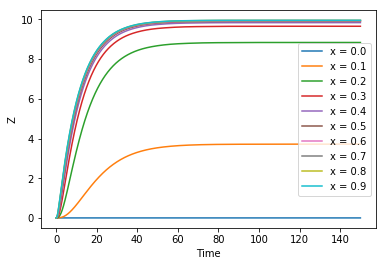

In [2]:
# Write code here
# we will only look at z on the graphs
xs = np.arange(0,1,0.1)
legs = []
for x in xs:
    params = (vY_max, Ky, ny, vZ_max, Kz, nz, d, x)
    ca = lambda t,y : chain_activator(t,y, params)
    sol = scipy.integrate.solve_ivp( fun=ca, t_span=(0,150), y0=(Y0,Z0), t_eval=np.arange(0,150,.01) )
    plt.plot(sol.t, sol.y.T[:,1])
    legs.append("x = " + str(round(x,1)))
plt.xlabel("Time")
plt.ylabel("Z")
plt.legend(legs);

As we get closer to Z at 10, we seem to not amplify as much from a higher X. To restate, as X gets larger from 0 to 1, the effects of amplification seem to get less after around 0.2 on the graph. The reason seems to be the hill equation. If we look at the hill equation (shown below for thoroughness), we can see that we only go from 0 to 1 on the graph. In our simulation we do the same, but our bound is 10 by multiplying by 10. The simulation maxes out at 10, so as we get closer and closer to the upper bound of 10, the amplification becomes less and less after X being 0.2.

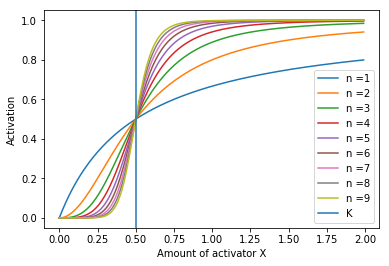

In [3]:
# Standard hill equation plotted
# Thoroughness
vmax_z = 1
K_xz = 0.5
n_xz = 5

x = np.arange(0,2,0.01)
ns = np.arange(1,10,1)
legs = []
for i in range(ns.size):
    n_xz = ns[i]
    activation = vmax_z* x**n_xz/(K_xz**n_xz + x**n_xz)
    plt.plot( x, activation )
    legs.append( "n =" + str(n_xz) )
plt.axvline( K_xz )
legs.append( 'K')
plt.legend( legs )
plt.xlabel( 'Amount of activator X')
plt.ylabel( 'Activation');

In the graph above we can see that the hill equation has an asymptote at 1 and 0, where they level out, meaning that the previous graph has an asymptote as well, displaying the relationship between the hill equation and our chain activation function since the n and x are in the same term.

<hr style="border:2px solid gray"> </hr>

(4) If we increase the Hill coefficient, how does the answer to (3) change? Why?

Note: For the sake of simplicity, you can vary $n_Y$ and $n_Z$ together.

*Opportunity for thoroughness: Please feel free to add additional code and Markdown cells to make your explanation as complete as possible.*

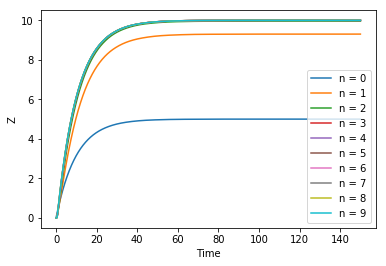

In [4]:
# Write code here
#vary only ny and nz together, then check against z. x doesnt change, lets stay at .5 or 1
ns = np.arange(0,10,1)
x = 1
legs = []
for i in range(len(ns)):
    params = (vY_max, Ky, ns[i], vZ_max, Kz, ns[i], d, x)
    ca = lambda t,y : chain_activator(t,y, params)
    sol = scipy.integrate.solve_ivp( fun=ca, t_span=(0,150), y0=(Y0,Z0), t_eval=np.arange(0,150,.01) )
    plt.plot(sol.t, sol.y.T[:,1])
    legs.append("n = " + str(ns[i]))
plt.xlabel("Time")
plt.ylabel("Z")
plt.legend(legs);

We varied ny and nz together, and we get a similar graph to when we varied x from 0 to 1. The x and the ny/nz are in the same area of the equation, because x is raised to the exponent of ny and y is raised to the exponent of y. It makes sense that they are related, as we vary from 0 to the upper bound.

<hr style="border:2px solid gray"> </hr>

(5) What is the relationship between the response time of Z and the onset of the signal? Numerically determine Z's response time by estimating its steady-state $Z_{SS}$ and the time it takes for Z to become $Z_{SS}/2$ (in the original configuration and others if you would like to explore further).

*Opportunity for thoroughness: Please feel free to add additional code and Markdown cells to make your explanation as complete as possible.*

981
5.001323388237169
59.80999999999805


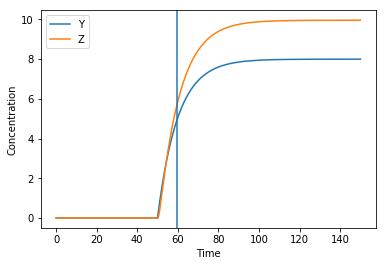

In [5]:
# Write code here
vY_max = 1
Ky = 0.5
ny = 2
vZ_max = 1
Kz = 0.5
nz = 2
d = 0.1

Y0 = 0
Z0 = 0

params_off = (vY_max, Ky, ny, vZ_max, Kz, nz, d, 0)
params_on = (vY_max, Ky, ny, vZ_max, Kz, nz, d, 1)


time_x_on = 50
ca_off = lambda t,y : chain_activator(t,y, params_off)
ca_on = lambda t,y : chain_activator(t,y, params_on)

sol1 = scipy.integrate.solve_ivp( fun=ca_off, t_span=(0,time_x_on), y0=(Y0,Z0), t_eval=np.arange(0,time_x_on,.01) )
sol2 = scipy.integrate.solve_ivp( fun=ca_on, t_span=(time_x_on,150), y0=sol1.y[:,-1], t_eval=np.arange(time_x_on,150,.01) )

#plot it

plt.plot(sol1.t, sol1.y.T)
plt.gca().set_prop_cycle(None)
plt.plot(sol2.t, sol2.y.T)
plt.legend(["Y", "Z"])
plt.xlabel("Time")
plt.ylabel("Concentration")


#the steady state for z here seems to be at 10 (estimated), and so Zss / 2 = 10/2 = 5
#so we ask, what time does it take to reach 5 concentration?
idx = (np.abs(np.asarray(sol2.y) - 5)).argmin()
print(idx)
print(np.asarray(sol2.y[0,idx])) # closest to 5
#print("Now go to time")
print(np.asarray(sol2.t[idx]))
# as we can see, it hits Zss/2 around 60
plt.axvline(np.asarray(sol2.t[idx]));
#could do extension: do it on another data point

## Part 2. A Feed-Forward Loop

Next, consider a common feed-forward loop (see image below) similar to the activation cascade, but in which X\* also "feeds forward" its signal directly to Z. The regulation of X\* and Y\* work together to activate transcription. Logically, we think of them as being "ANDed" together. Mathematically, we express it by multiplying the two regulation terms. We use the same assumptions as above, and therefore mostly the same parameters. Because there are two regulators for Z, we use $K_{ZX}$, $K_{ZY}$, $n_{ZX}$, and $n_{ZY}$ instead of just $K_Z$ and $n_Z$.

<img src="FFLC1.pdf">
<center>A signal cascade of activators. X* activates synthesis of protein Y, which activates synthesis of protein Z.</center>


<hr style="border:2px solid gray"> </hr>

(1) Write down the ODEs that describe this system. Like above, use 2 ODEs.

The parameters are
- vY_max: maximum rate of Y's transcription
- Ky: the activation threshold for X's activation of Y
- ny: the Hill coefficient (exponent) for X's activation of Y
- d: the degradation rate constant for Y and Z
- X: the amount of X in the system
- vZmax: maximum rate of Z's transcription
- Kzx: the activation threshold for X's activation of Z
- Kzy: the activation threshold for Y's activation of Z
- nzx: the Hill coefficient (exponent) for X's activation of Z
- nzy: the Hill coefficient (exponent) for Y's activation of Z


The model's activation function is

$\frac{dY}{dt} = vY_{max} \frac{x^{n_{y}}}{K_{y}^{n_{y}}+x^{n_{y}}}-d*Y$

$\frac{dZ}{dt} = vZ_{max} \frac{x^{n_{zx}}}{K_{zx}^{n_{zx}}+x^{n_{zx}}} * \frac{y^{n_{zy}}}{K_{zy}^{n_{zy}}+y^{n_{zy}}}-d*Z$

<hr style="border:2px solid gray"> </hr>

(2) Write the Python code necessary to simulate the system. Given the parameters, $vY_{max} = 1 nM/s$, $K_Y = 0.5 nM$, $n_Y=2$, $vZ_{max} = 1 nM/s$, $K_{ZX} = 0.5 nM$, $n_{ZX}=2$, $K_{ZY} = 0.5 nM$, $n_{ZY}=2$, and $d=1$ and initial conditions $Y(0) =0$ and $Z(0)=0$, simulate the system for 3.5 seconds with the signal "off" during the first 0.5 seconds and "on" for the rest of the simulation. In other words, simulate the system from $t=0$ to $t=3.5s$ (with a time step $\le0.01s$) when the input X*(t) = 0 for $0\le t<0.5s$ and X*(t) = 1 thereafter.

Text(0.5, 0, 'Time')

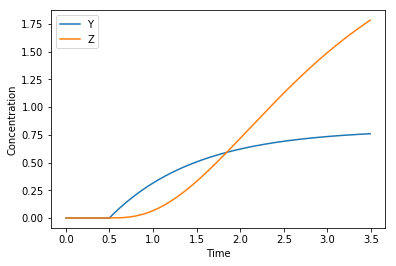

In [6]:
# Write code here.
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt
vYmax = 1
Ky = 0.5
ny = 2
vZmax = 1
KZX = 0.5
nZX = 2
KZY = 0.5
nZY = 2
d = 1
#initial
Y0 = 0
Z0 = 0

def feed_forward(t, statevars, params):
    Y = statevars[0]
    Z = statevars[1]

    vYmax = params[0]
    Ky = params[1]
    ny = params[2]
    vZmax = params[3]
    KZX = params[4]
    nZX = params[5]
    KZY = params[6]
    nZY = params[7]
    d = params[8]
    x = params[9]

    dydt = np.zeros( (2,) )
    dydt[0] = (vYmax * ( (x**ny)/(Ky**ny + x**ny) )) - (d * Y)
    dydt[1] = (vZmax * ( (x**nZX)/(KZX**nZX + x**nZX) ) * ( (Y**nZY)/KZY**nZY + Y**nZY )) - (d * Z)
    return dydt

time_x_on = 0.5
time_end = 3.5
params_off = (vYmax, Ky, ny, vZmax, KZX, nZX, KZY, nZY, d, 0)
params_on = (vYmax, Ky, ny, vZmax, KZX, nZX, KZY, nZY, d, 1)
ff_off = lambda t,y : feed_forward(t, y, params_off)
ff_on = lambda t,y : feed_forward(t, y, params_on)

sol1 = scipy.integrate.solve_ivp(fun=ff_off, t_span=(0,time_x_on), y0=(Y0,Z0), t_eval = np.arange(0, time_x_on, .01))
sol2 = scipy.integrate.solve_ivp(fun=ff_on, t_span=(time_x_on, time_end), y0=sol1.y[:,-1], t_eval = np.arange(time_x_on, time_end, .01))

#plot
plt.plot(sol1.t, sol1.y.T)
plt.gca().set_prop_cycle(None)
plt.plot(sol2.t, sol2.y.T)
plt.legend(["Y","Z"])
plt.ylabel("Concentration")
plt.xlabel("Time")

<hr style="border:2px solid gray"> </hr>

(3) The biological purpose is to allow the system to ignore signals that are too short. In other words, this system is not set off accidentally by random fluctuations in certain proteins. Demonstrate how this feed-forward system is immune to short signals where as the cascade of activators is susceptible to it. Is a feed-forward loop immune to short signals because it delays the signal's off-to-on transition or on-to-off transition? Or both? You may want to compare the timing of these transitions in the feed-forward loop to the timing of these transitions in the simple cascade from the previous problem.

Text(0.5, 0, 'Time')

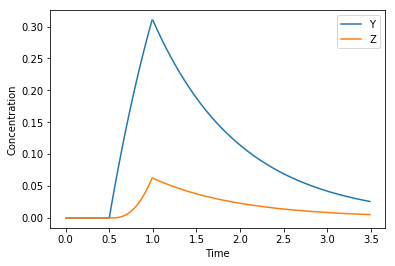

In [7]:
#off to on transition is blocked by short signal, so here Z does not get bigger than y when we turn x on and off very fast
vYmax = 1
Ky = 0.5
ny = 2
vZmax = 1
KZX = 0.5
nZX = 2
KZY = 0.5
nZY = 2
d = 1
#initial
Y0 = 0
Z0 = 0
time_x_on = 0.5
time_x_off = 1
time_end = 3.5
params_off = (vYmax, Ky, ny, vZmax, KZX, nZX, KZY, nZY, d, 0)
params_on = (vYmax, Ky, ny, vZmax, KZX, nZX, KZY, nZY, d, 1)
ff_off = lambda t,y : feed_forward(t, y, params_off)
ff_on = lambda t,y : feed_forward(t, y, params_on)

sol1 = scipy.integrate.solve_ivp(fun=ff_off, t_span=(0,time_x_on), y0=(Y0,Z0), t_eval = np.arange(0, time_x_on, .01))
sol2 = scipy.integrate.solve_ivp(fun=ff_on, t_span=(time_x_on, time_x_off), y0=sol1.y[:,-1], t_eval = np.arange(time_x_on, time_x_off, .01))
sol3 = scipy.integrate.solve_ivp(fun=ff_off, t_span=(time_x_off, time_end), y0=sol2.y[:,-1], t_eval = np.arange(time_x_off, time_end, .01))

#plot
plt.plot(sol1.t, sol1.y.T)
plt.gca().set_prop_cycle(None)
plt.plot(sol2.t, sol2.y.T)
plt.gca().set_prop_cycle(None)
plt.plot(sol3.t, sol3.y.T)
plt.legend(["Y","Z"])
plt.ylabel("Concentration")
plt.xlabel("Time")

Text(0.5, 0, 'Time')

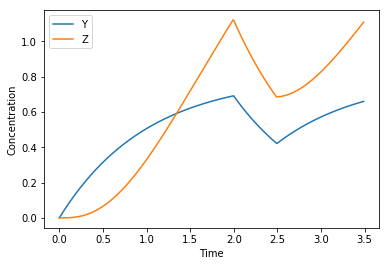

In [8]:
#on to off transition is too fast, at .5 time, so the z does not drop below the y, because of a short signal of off
vYmax = 1
Ky = 0.5
ny = 2
vZmax = 1
KZX = 0.5
nZX = 2
KZY = 0.5
nZY = 2
d = 1
#initial
Y0 = 0
Z0 = 0
time_x_on = 2
time_x_off = 2.5
time_end = 3.5
params_off = (vYmax, Ky, ny, vZmax, KZX, nZX, KZY, nZY, d, 0)
params_on = (vYmax, Ky, ny, vZmax, KZX, nZX, KZY, nZY, d, 1)
ff_off = lambda t,y : feed_forward(t, y, params_off)
ff_on = lambda t,y : feed_forward(t, y, params_on)

sol1 = scipy.integrate.solve_ivp(fun=ff_on, t_span=(0,time_x_on), y0=(Y0,Z0), t_eval = np.arange(0, time_x_on, .01))
sol2 = scipy.integrate.solve_ivp(fun=ff_off, t_span=(time_x_on, time_x_off), y0=sol1.y[:,-1], t_eval = np.arange(time_x_on, time_x_off, .01))
sol3 = scipy.integrate.solve_ivp(fun=ff_on, t_span=(time_x_off, time_end), y0=sol2.y[:,-1], t_eval = np.arange(time_x_off, time_end, .01))

#plot
plt.plot(sol1.t, sol1.y.T)
plt.gca().set_prop_cycle(None)
plt.plot(sol2.t, sol2.y.T)
plt.gca().set_prop_cycle(None)
plt.plot(sol3.t, sol3.y.T)
plt.legend(["Y","Z"])
plt.ylabel("Concentration")
plt.xlabel("Time")

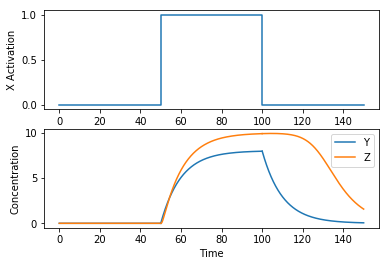

In [9]:
#extension: do the same for cascading activator
vY_max = 1
Ky = 0.5
ny = 2
vZ_max = 1
Kz = 0.5
nz = 2
d = 0.1

Y0 = 0 #initial values
Z0 = 0

params_off = (vY_max, Ky, ny, vZ_max, Kz, nz, d, 0)
params_on = (vY_max, Ky, ny, vZ_max, Kz, nz, d, 1)


time_x_on = 50
time_x_off = 100
ca_off = lambda t,y : chain_activator(t,y, params_off)
ca_on = lambda t,y : chain_activator(t,y, params_on)

sol1 = scipy.integrate.solve_ivp( fun=ca_off, t_span=(0,time_x_on), y0=(Y0,Z0), t_eval=np.arange(0,time_x_on,.01) )
sol2 = scipy.integrate.solve_ivp( fun=ca_on, t_span=(time_x_on, time_x_off), y0=sol1.y[:,-1], t_eval=np.arange(time_x_on, time_x_off,.01) )
sol3 = scipy.integrate.solve_ivp( fun=ca_off, t_span=(time_x_off,150), y0=sol2.y[:,-1], t_eval=np.arange(time_x_off,150,.01) )

plt.subplot(2,1,1)
plt.plot([0, time_x_on, time_x_on, time_x_off, time_x_off, 150], [0, 0, 1, 1, 0, 0])
plt.ylabel("X Activation")
plt.xlabel("Time")
plt.gca().set_prop_cycle(None)
plt.subplot(2,1,2)
plt.plot(sol1.t, sol1.y.T)
plt.gca().set_prop_cycle(None)
plt.plot(sol2.t, sol2.y.T)
plt.gca().set_prop_cycle(None)
plt.plot(sol3.t, sol3.y.T)
plt.legend(["Y", "Z"])
plt.ylabel("Concentration")
plt.xlabel("Time");

For this extension, we can see the x activation compared to the concentration of Y and Z in the chain activation function. We are looking here at a short signal of X (50). We can see, that once X is activated, Y and Z both rise, where Z rises faster because of the amplificiation. Then, the drop of the activation of X to 0 at time 100 shows on the concentration graph in the concentration of Y and Z. The Y goes down very fast, but Z stays high for longer than Y. This is because although the concentration of Y is decreasing, it is still positive, and is activating Z. However, as we reach close to 0 with Y, Z starts to drop given that there is not enough Y as an activator to activate the concentration of Z.

## Part 3. A Negative Feedback Loop

Another ubiquitous gene network structure is that of the negative feedback loop. In 1995, Albert Goldbeter published an important mathematical model of the gene regulatory network in the fruit fly circadian clock. Even though it involves only one protein, it is remarkable in its ability to behave realistically.

Read the paper "A model of circadian oscillations in the *Drosophila* period protein", *Proc. R. Soc. Lond. B*, 1995, which can be found at <a href="http://www.jstor.org/pss/50324">JStor</a> that Stephanie emailed to you.

<hr style="border:2px solid gray"> </hr>

(1) Reproduce Figure 2. The equations are specified in the text, and the parameter values are given in the figure's caption. Because this is a limit cycle oscillator, the system will achieve its cycle (rhythmic behavior) regardless of initial conditions. Initial conditions do, however, determine *when* the system achieves the rhythmic behavior -- if you start too far away from the cycle, you will have to simulate a long time before you see rhythms. Examine Goldbeter's Figure 2 to determine a reasonable set of initial conditions. Write the appropriate Python code, and run it. Your new figure does not need to use the same line styles as Goldbeter's, but it should have the same values at the same times (i.e. the mRNA component should peak around $t=12h$).

Note: Be careful. The text is little and it is possible to mistake $K_1$ (K one) for $K_I$ (K eye) and vice versa. Both are used in the equations.

Note: A strategy that I use for finding the periodic solution is to run the solver for 240 hours (to simulate 10 days), then grab the value of the state variables at the last time point. I use that value to begin a second, shorter, simulation that I plot.

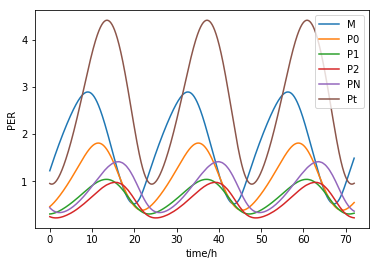

In [18]:
# Write code here
vs = 0.76
vm = 0.65
Km = 0.5
ks = 0.38
vd = 0.95
k1 = 1.9
k2 = 1.3
KI = 1
Kd = 0.2
n = 4
K1 = 2
K2 = 2
K3 = 2
K4 = 2
V1 = 3.2
V2 = 1.58
V3 = 5
V4 = 2.5

def negative_feedback(t, statevars, params):
    M = statevars[0]
    P0 = statevars[1]
    P1 = statevars[2]
    P2 = statevars[3]
    PN = statevars[4]
    PT = statevars[5]

    vs = params[0]
    vm = params[1]
    Km = params[2]
    ks = params[3]
    vd = params[4]
    k1 = params[5]
    k2 = params[6]
    KI = params[7]
    Kd = params[8]
    n = params[9]
    K1 = params[10]
    K2 = params[11]
    K3 = params[12]
    K4 = params[13]
    V1 = params[14]
    V2 = params[15]
    V3 = params[16]
    V4 = params[17]

    dydt = np.zeros( (6,) )
    dydt[0] = ( vs * ((KI**n)/(KI**n + PN**n)) ) - ( vm * ((M)/(Km + M)) )
    dydt[1] = ks*M - (V1 * ((P0)/(K1+P0))) + (V2 * ((P1)/(K2+P1)))
    dydt[2] = (V1*((P0)/(K1+P0))) - (V2*((P1)/(K2+P1))) - (V3*((P1)/(K3+P1))) + (V4*((P2)/(K4+P2)))
    dydt[3] = (V3*((P1)/(K3+P1))) - (V4*((P2)/(K4+P2))) - (k1*P2) + (k2*PN) - (vd*((P2)/(Kd+P2)))
    dydt[4] = (k1*P2) - (k2*PN)
    dydt[5] = dydt[1]+dydt[2]+dydt[3]+dydt[4]
    return dydt

params = (vs, vm , Km, ks, vd, k1, k2, KI, Kd, n, K1, K2, K3, K4, V1, V2, V3, V4)
initial = (0.5, 0.5, 0.5, 0.5, 1, 2)
nf = lambda t,y : negative_feedback(t, y, params)
sol1 = scipy.integrate.solve_ivp(fun=nf, t_span=(0,240), y0=initial, t_eval = np.arange(0,240,0.01))
sol2 = scipy.integrate.solve_ivp(fun=nf, t_span = (0,72), y0=sol1.y[:,-1], t_eval=np.arange(0,72,0.01))

plt.plot(sol2.t, sol2.y.T)
plt.legend(["M", "P0", "P1", "P2", "PN", "Pt"])
plt.xlabel("time/h")
plt.ylabel("PER");

<hr style="border:2px solid gray"> </hr>

(2) One of the discussions in the paper is about the importance of the rate of doubly-phosphorylated PER degradation ($v_d$) on the period of the oscillation. He doubles the rate of PER translation (i.e. $k_s=0.78h_{-1}$ ). Using this set of parameters, he simulates the model many times, each time using different value of $v_d$. He demonstrates the strong depends of the period on the value of $v_d$. Then, in the text, he also mentions that the amplitude of oscillation depends on $v_d$ in an unintuitive direction -- increasing degradation of PER actually causes the maximum level of total PER to increase. This happens because the time evolutions of PER and *per* mRNA are closely intertwined. In other words, they are in a network with feedback and the process of degradation cannot be studied effectively in isolation. Write Python code to vary the value of $v_d$ and generate one or more figures to illustrate this unintuitive behavior. Is the same true for mRNA degradation? If so, why? If not, why not?

Note: Answer this question by performing a similar experiment that varies $v_m$. Be sure to take into account only those values of $v_m$ that allow the system to oscillate.

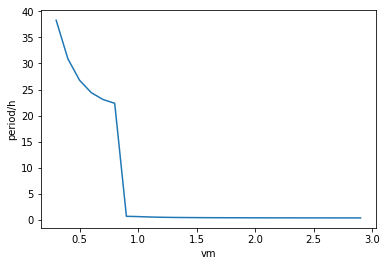

In [15]:
# Write code here
#so we are looking at varying vm, but the paper says to double Ks, so Ks = 0.78
import numpy as np
import scipy.signal
vs = 0.76
vm = 0.65
Km = 0.5
ks = 0.38
vd = 0.95
k1 = 1.9
k2 = 1.3
KI = 1
Kd = 0.2
n = 4
K1 = 2
K2 = 2
K3 = 2
K4 = 2
V1 = 3.2
V2 = 1.58
V3 = 5
V4 = 2.5
def get_period(arr,t):
    peaks, _ = scipy.signal.find_peaks(arr)
    time = []
    for peak in peaks:
        time.append(t[peak])
    periods = []
    for i in range(len(time)-1,0,-1):
        periods.append(time[i] - time[i-1])
        
    return np.mean(periods)

#ks = 0.78
#now we vary vm, then we need to look at amplitudes?
vms = np.arange(0, 3, 0.1)
plotPeriod = []
for vm in vms:
    params = (vs, vm , Km, ks, vd, k1, k2, KI, Kd, n, K1, K2, K3, K4, V1, V2, V3, V4)
    initial = (0.5, 0.5, 0.5, 0.5, 1, 2)
    nf = lambda t,y : negative_feedback(t, y, params)
    sol1 = scipy.integrate.solve_ivp(fun=nf, t_span=(0,240), y0=initial, t_eval = np.arange(0,240,0.01))
    sol2 = scipy.integrate.solve_ivp(fun=nf, t_span = (0,72), y0=sol1.y[:,-1], t_eval=np.arange(0,72,0.01))
    #now we have graphs, find one period consistent and graph like at end by appending these periods
    #we should graph plot of (vms and periods)
    #plt.plot(sol2.t, sol2.y[1,:])
    plotPeriod.append(get_period(sol2.y[1,:], sol2.t))
    #print(get_period(sol2.y[1,:], sol2.t))
    #plt.plot(sol2.t, sol2.y.T)
    #stage change
plt.plot(vms, plotPeriod)
plt.ylabel("period/h")
plt.xlabel("vm");


Here we look at the vm variable, where vm stands for the degradation of M that is seen in the previous graph. We see that as we increase vm, the period becomes shorter, because there is a faster degradation, meaning that we have a higher frequency of synthesis and degradation cycles.

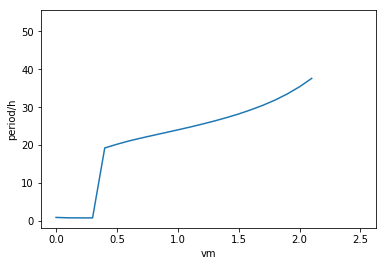

In [17]:
# Write code here
#so we are looking at varying vm, but the paper says to double Ks, so Ks = 0.78
import numpy as np
import scipy.signal

vs = 0.76
vm = 0.65
Km = 0.5
ks = 0.38
vd = 0.95
k1 = 1.9
k2 = 1.3
KI = 1
Kd = 0.2
n = 4
K1 = 2
K2 = 2
K3 = 2
K4 = 2
V1 = 3.2
V2 = 1.58
V3 = 5
V4 = 2.5
# ks = 0.78
#now we vary vm, then we need to look at amplitudes?
vms = np.arange(0, 3, 0.1)
plotPeriod = []
for vd in vms:
    params = (vs, vm , Km, ks, vd, k1, k2, KI, Kd, n, K1, K2, K3, K4, V1, V2, V3, V4)
    initial = (0.5, 0.5, 0.5, 0.5, 1, 2)
    nf = lambda t,y : negative_feedback(t, y, params)
    sol1 = scipy.integrate.solve_ivp(fun=nf, t_span=(0,240), y0=initial, t_eval = np.arange(0,240,0.01))
    sol2 = scipy.integrate.solve_ivp(fun=nf, t_span = (0,72), y0=sol1.y[:,-1], t_eval=np.arange(0,72,0.01))
    #now we have graphs, find one period consistent and graph like at end by appending these periods
    #we should graph plot of (vms and periods)
    #plt.plot(sol2.t, sol2.y[1,:])
    plotPeriod.append(get_period(sol2.y[1,:], sol2.t))
    #print(get_period(sol2.y[1,:], sol2.t))
    #plt.plot(sol2.t, sol2.y.T)
    #stage change
plt.plot(vms, plotPeriod)
plt.ylabel("period/h")
plt.xlabel("vm");



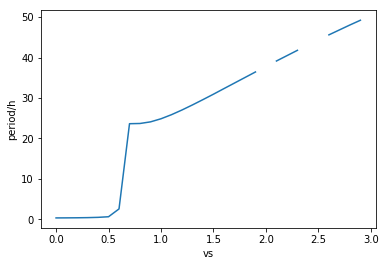

In [20]:
# Write code here
#so we are looking at varying vm, but the paper says to double Ks, so Ks = 0.78
import numpy as np
import scipy.signal
vs = 0.76
vm = 0.65
Km = 0.5
ks = 0.38
vd = 0.95
k1 = 1.9
k2 = 1.3
KI = 1
Kd = 0.2
n = 4
K1 = 2
K2 = 2
K3 = 2
K4 = 2
V1 = 3.2
V2 = 1.58
V3 = 5
V4 = 2.5
vss = np.arange(0, 3, 0.1)
plotPeriod = []
for vs in vss:
    params = (vs, vm , Km, ks, vd, k1, k2, KI, Kd, n, K1, K2, K3, K4, V1, V2, V3, V4)
    initial = (0.5, 0.5, 0.5, 0.5, 1, 2)
    nf = lambda t,y : negative_feedback(t, y, params)
    sol1 = scipy.integrate.solve_ivp(fun=nf, t_span=(0,240), y0=initial, t_eval = np.arange(0,240,0.01))
    sol2 = scipy.integrate.solve_ivp(fun=nf, t_span = (0,72), y0=sol1.y[:,-1], t_eval=np.arange(0,72,0.01))
    #now we have graphs, find one period consistent and graph like at end by appending these periods
    #we should graph plot of (vms and periods)
    #plt.plot(sol2.t, sol2.y[1,:])
    plotPeriod.append(get_period(sol2.y[1,:], sol2.t))
    #print(get_period(sol2.y[1,:], sol2.t))
    #plt.plot(sol2.t, sol2.y.T)
    #stage change
plt.plot(vss, plotPeriod)
plt.ylabel("period/h")
plt.xlabel("vs");
# plt.legend(["M", "P0", "P1", "P2", "PN", "Pt"])
# plt.xlabel("time/h")
# plt.ylabel("PER");
# put here for a change

As an extension we also vary vs and look at the period. Here we look at the vs variable instead of the vm variable as vs represents the maximum rate that M is synthesized in the nucleus and transferred to the cytosol. The graph displays that as vs increases, which is the synthesis rate, the period goes up because the degradation is the same, and when we synthesize we just keep a high amount of the variable.

<hr style="border:2px solid gray"> </hr>

Acknowledgements

*Replace this text with links to external resources and thanks to people you worked with.*